In [1]:
# Options

## Debugging level
debug_level = 0


In [4]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)


In [5]:
atlas.head()

Number of Users              Invoice Date  Invoice #  \
Customers                                                            
University 1              NaN 2015-03-20 00:00:00-04:00  ATLAS 315   
University 2            250.0 2015-05-28 00:00:00-04:00      AJ501   
University 3            100.0 2015-06-23 00:00:00-04:00      AJ502   
University 4              NaN 2015-06-26 00:00:00-04:00      AJ503   
University 5              NaN 2015-10-07 00:00:00-04:00      AJ504   

              Invoice Amount Subscription            Account Code   \
Customers                                                            
University 1         72000.0       1 Year  4700-0-00-00000-18-0000   
University 2          3500.0       1 Year  4700-0-00-00000-16-0000   
University 3          3500.0       1 Year  4700-0-00-00000-17-0000   
University 4          6500.0       1 Year  4700-0-00-00000-32-0000   
University 5           750.0       1 Year  4700-0-00-00000-20-0000   

                                                Address        Lat       Long  \
Customers                                                                       
University 1    1201 N 3rd St #6, Baton Rouge, LA 70802  30.460190 -91.188530   
University 2           1 Kellogg Cir, Emporia, KS 66801  38.392609 -96.181396   
University 3    150 University Blvd, Morehead, KY 40351  38.184921 -83.434441   
University 4       44 Pierrepont Ave, Potsdam, NY 13676  44.663780 -74.978409   
University 5  47645 College Dr, St Marys City, MD 20686  38.190601 -76.426300   

                         Service Start               Service End  \
Customers                                                          
University 1 2015-03-18 00:00:00-04:00 2016-06-30 00:00:00-04:00   
University 2 2015-06-01 00:00:00-04:00 2016-06-30 00:00:00-04:00   
University 3 2015-06-10 00:00:00-04:00 2016-06-30 00:00:00-04:00   
University 4 2015-06-01 00:00:00-04:00 2016-06-30 00:00:00-04:00   
University 5 2015-10-05 00:00:00-04:00 2016-09-30 00:00:00-04:00   

             Subscription Duration  
Customers                           
University 1              365 days  
University 2              365 days  
University 3              365 days  
University 4              365 days  
University 5              365 days

In [6]:
(atlas["Invoice Date"] - atlas["Service Start"]).apply(lambda date: date.days)

Customers
University 1       2.0
University 2      -4.0
University 3      13.0
University 4      25.0
University 5       2.0
                  ... 
University 126   -57.0
University 399     2.0
University 400     2.0
University 401     2.0
University 33      2.0
Length: 669, dtype: float64

<AxesSubplot:xlabel='Customers'>

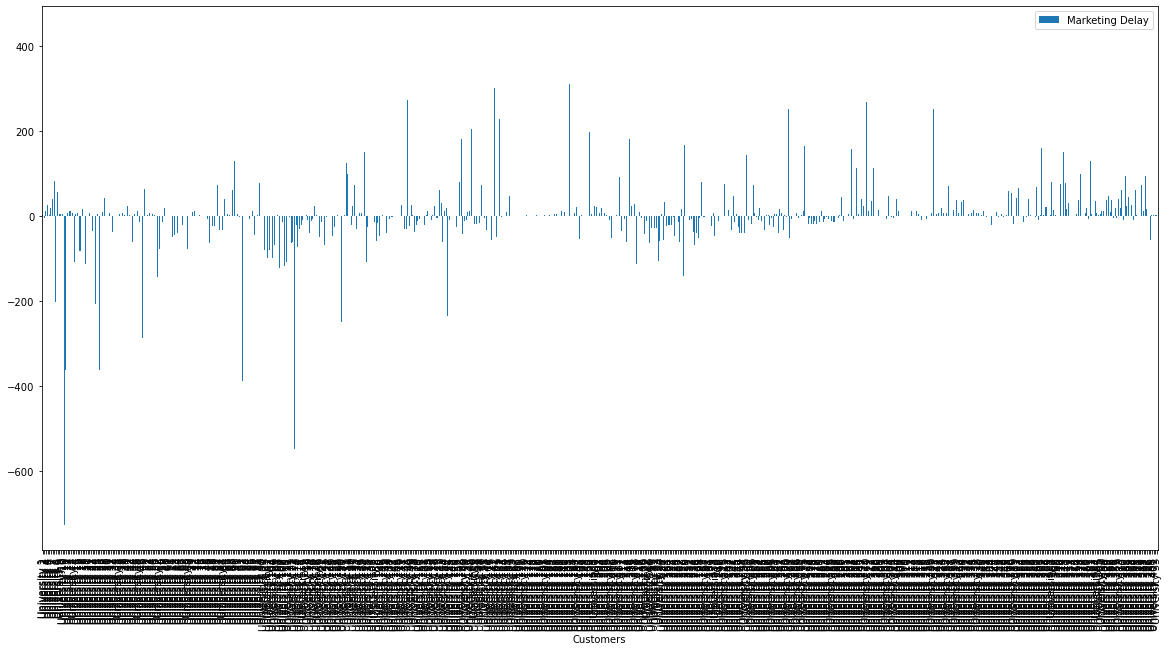

In [7]:
# Plot delays between marketing initiation and payment date (NOTE: This is sample data and not accurate until relevant data is available.)
marketing_delay = atlas["Invoice Date"] - atlas["Service Start"]
marketing_delay_days = marketing_delay.apply(lambda date: date.days)
marketing_delay_df = pd.DataFrame(marketing_delay_days, columns=["Marketing Delay"])
marketing_delay_df.plot.bar(figsize=(20, 10))

# TODO Group by customer regardless and Group by subscription length.
# TODO Response time for each state
# TODO Response time for each type of customer ("ATLAS Customer Type")
# TODO Response time for each type of customer ("Organization Record Type")
# TODO Data on potential customers and %success


<AxesSubplot:ylabel='Customers'>

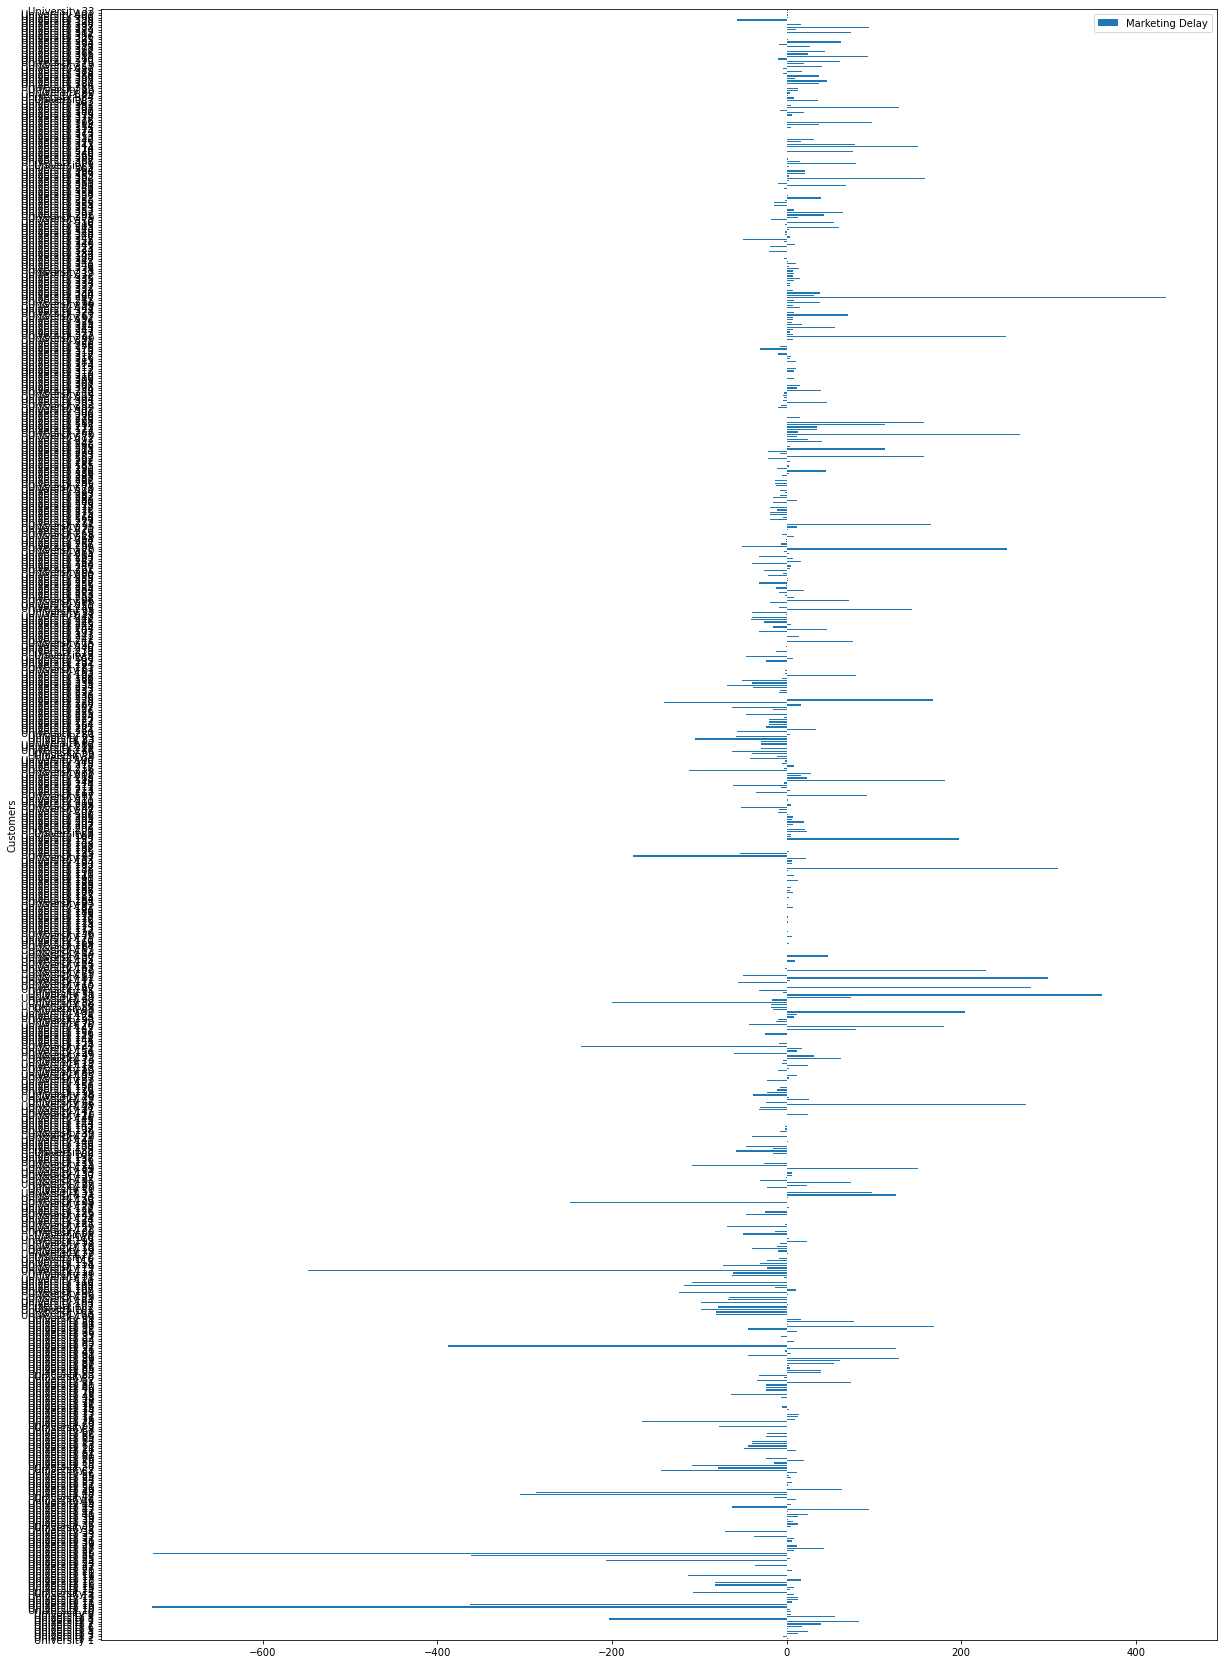

In [8]:
marketing_delay_df.plot.barh(figsize=(20, 30))

In [9]:
# Basic info
total_invoiced_per_customer = atlas.groupby(["Customers"]).sum()
total_invoiced_per_customer.head()

Number of Users  Invoice Amount         Lat        Long
Customers                                                              
University 1                0.0       139000.00   60.920165 -182.377131
University 10             350.0        11200.01  195.981848 -451.234735
University 100            200.0         2250.00    0.000000    0.000000
University 101             25.0         5775.00    0.000000    0.000000
University 102             25.0          500.00    0.000000    0.000000

In [10]:
atlas.head(1)

Number of Users              Invoice Date  Invoice #  \
Customers                                                            
University 1              NaN 2015-03-20 00:00:00-04:00  ATLAS 315   

              Invoice Amount Subscription            Account Code   \
Customers                                                            
University 1         72000.0       1 Year  4700-0-00-00000-18-0000   

                                              Address       Lat      Long  \
Customers                                                                   
University 1  1201 N 3rd St #6, Baton Rouge, LA 70802  30.46019 -91.18853   

                         Service Start               Service End  \
Customers                                                          
University 1 2015-03-18 00:00:00-04:00 2016-06-30 00:00:00-04:00   

             Subscription Duration  
Customers                           
University 1              365 days

In [11]:
def fcn(df):
    print(f"Size of df: {df.size}")
    # dfs = df["Subscription"]
    # print(f"Contents of of df[Subscription]: {dfs}")
    # print(f"Contents of of df: {df}")

    customer_subscriptions_ordered_by_date = df.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")
    # subscriptions = df#.reset_index().loc[["Subscription", "Service Start"]]
    # subscriptions = df["Subscription"].values
    print(customer_subscriptions_ordered_by_date)

    print(customer_subscriptions_ordered_by_date)

    # TODO fcn to compute upgrade, downgrade, and delays between them.

    return df


# Calculate conversion rates across various subscription combinations
repeat_customers = atlas.index.duplicated()
print(f"There are {repeat_customers.sum()} universities in this dataset who purchased 2 or more subscriptions.")
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
# atlas.loc[repeat_customers].groupby("Customers").apply(lambda x: x["Subscription"])
atlas.loc[repeat_customers].groupby("Customers").apply(fcn)

# TODO Reduce #groups by also grouping by location, type of customer etc.

# TODO Add a category and grouping everywhere based on total or trailing invoice value (0-100k, 100k-1M, etc)

# TODO: Tag the following:
# - Drop-off in subscription length
# - Drop-off in subscription coverage
# - Upgrades with coverage gaps
# - Upgrades with no coverage gaps
# - Any coverage gaps

# TODO Find late payers past threshold

-04:00
Size of df: 12
               Subscription             Service Start
Customers                                            
University 312       1 Year 2020-08-21 00:00:00-04:00
               Subscription             Service Start
Customers                                            
University 312       1 Year 2020-08-21 00:00:00-04:00
Size of df: 48
              Subscription             Service Start
Customers                                           
University 33       1 Year 2016-03-22 00:00:00-04:00
University 33       1 Year 2018-07-31 00:00:00-04:00
University 33       1 Year 2019-09-06 00:00:00-04:00
University 33       1 Year 2020-08-31 00:00:00-04:00
              Subscription             Service Start
Customers                                           
University 33       1 Year 2016-03-22 00:00:00-04:00
University 33       1 Year 2018-07-31 00:00:00-04:00
University 33       1 Year 2019-09-06 00:00:00-04:00
University 33       1 Year 2020-08-31 00:00:00-04:00
Siz

Number of Users              Invoice Date  Invoice #  \
Customers                                                              
University 7                NaN 2015-12-10 00:00:00-05:00      AJ507   
University 7                NaN 2020-10-09 00:00:00-04:00  NB100920A   
University 1                NaN 2015-12-11 00:00:00-05:00     AJ5081   
University 9                NaN 2016-01-06 00:00:00-05:00      AJ509   
University 9              135.0 2020-01-13 00:00:00-05:00        251   
...                         ...                       ...        ...   
University 173           6271.0 2020-10-20 00:00:00-04:00  NB102020A   
University 221            200.0 2020-11-02 00:00:00-05:00  NB110220C   
University 312             50.0 2020-11-03 00:00:00-05:00   NB110320   
University 389             50.0 2020-11-03 00:00:00-05:00   NB101920   
University 233             20.0 2020-11-03 00:00:00-05:00  NB110320A   

                Invoice Amount Subscription            Account Code   \
Customers                                                              
University 7           16200.0       1 Year  4700-4-11-00100-00-1502   
University 7           21000.0       1 Year  4700-0-00-00000-00-0000   
University 1           67000.0       1 Year  4700-0-00-00000-00-0000   
University 9             750.0       1 Year  4700-0-00-00000-00-0000   
University 9            2350.0       1 Year  4700-0-00-00000-00-0000   
...                        ...          ...                      ...   
University 173         16052.0     3 Months  4700-0-00-00000-00-0000   
University 221          3500.0       1 Year  4700-0-00-00000-00-0000   
University 312           500.0       1 Year  4700-0-00-00000-00-0000   
University 389            40.0     6 Months  4700-0-00-00000-00-0000   
University 233           200.0       1 Year  4700-0-00-00000-00-0000   

                                                  Address        Lat  \
Customers                                                              
University 7    1849 C Street, N.W Washington, D.C. 20240  38.894453   
University 7    1849 C Street, N.W Washington, D.C. 20240  38.894453   
University 1      1201 N 3rd St #6, Baton Rouge, LA 70802  30.459975   
University 9    231 W Hancock St, Milledgeville, GA 31061  33.080841   
University 9    231 W Hancock St, Milledgeville, GA 31061  41.683390   
...                                                   ...        ...   
University 173                                        NaN        NaN   
University 221                                        NaN        NaN   
University 312                                        NaN        NaN   
University 389                                        NaN        NaN   
University 233                                        NaN        NaN   

                     Long             Service Start               Service End  \
Customers                                                                       
University 7   -77.042603 2015-09-18 00:00:00-04:00 2016-12-31 00:00:00-05:00   
University 7   -77.042603 2020-10-01 00:00:00-04:00 2021-09-30 00:00:00-04:00   
University 1   -91.188601 2016-07-01 00:00:00-04:00 2017-12-31 00:00:00-05:00   
University 9   -83.231778 2016-01-01 00:00:00-05:00 2017-01-31 00:00:00-05:00   
University 9   -83.231778 2020-01-31 00:00:00-05:00 2021-01-31 00:00:00-05:00   
...                   ...                       ...                       ...   
University 173        NaN 2020-08-20 00:00:00-04:00 2020-12-12 00:00:00-05:00   
University 221        NaN 2020-11-02 00:00:00-05:00 2021-10-31 00:00:00-04:00   
University 312        NaN 2020-08-21 00:00:00-04:00 2021-08-31 00:00:00-04:00   
University 389        NaN 2020-10-23 00:00:00-04:00 2021-04-23 00:00:00-04:00   
University 233        NaN 2020-08-01 00:00:00-04:00 2021-07-31 00:00:00-04:00   

               Subscription Duration  
Customers                             
University 7                365 days  
University 7                365 da

In [12]:
# atlas.columns
atlas.loc[:, ["Subscription", "Service Start"]]
atlas.loc[:, ["Subscription", "Service Start"]].sort_values("Service Start")

Subscription             Service Start
Customers                                            
University 1         1 Year 2015-03-18 00:00:00-04:00
University 2         1 Year 2015-06-01 00:00:00-04:00
University 4         1 Year 2015-06-01 00:00:00-04:00
University 3         1 Year 2015-06-10 00:00:00-04:00
University 7         1 Year 2015-09-18 00:00:00-04:00
...                     ...                       ...
University 393       1 Year 2020-11-07 00:00:00-05:00
University 126       1 Year 2020-12-31 00:00:00-05:00
University 64       3 Years                       NaT
University 95        1 Year                       NaT
University 377      30 Days                       NaT

[669 rows x 2 columns]